<a href="https://colab.research.google.com/github/argONNY/-Untitled3.ipynb-/blob/main/LabWork1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
class Student:
    def __init__(self, name, group, grades):
        self.name = name
        self.group = group
        self.grades = list(map(float, grades))

    def average_grade(self):
        return sum(self.grades) / len(self.grades)

    def is_excellent(self):
        return self.average_grade() >= 4.5

students = []
with open("students.txt", "r", encoding="utf-8") as f:
    for line in f:
        name, group, grades_str = line.strip().split(";")
        grades = grades_str.split(",")
        students.append(Student(name, group, grades))

with open("excellent_students.txt", "w", encoding="utf-8") as f:
    for s in students:
        if s.is_excellent():
            f.write(f"{s.name} - {s.group}\n")

from collections import defaultdict
group_grades = defaultdict(list)

for s in students:
    group_grades[s.group].append(s.average_grade())

for group, avgs in group_grades.items():
    print(f"Группа {group}: средний балл = {sum(avgs)/len(avgs):.2f}")


Группа ЗФИ-202: средний балл = 4.40
Группа ЗПИ-101: средний балл = 4.00
Группа ЗФИ-121: средний балл = 4.60
Группа ЗФИ-222: средний балл = 4.40
Группа ЗПИ-111: средний балл = 5.00
Группа ЗПИ-202: средний балл = 3.60


In [118]:
import re


def analyze_logs(log_text):
    results = {}

    # 1. Поиск IPv4 адресов
    ip_pattern = r'\b(?:\d{1,3}\.){3}\d{1,3}\b'
    ip_addresses = re.findall(ip_pattern, log_text)
    results['ip_addresses'] = ip_addresses

    # 2. Поиск временных меток
    timestamp_pattern = r'\b\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\b'
    timestamps = re.findall(timestamp_pattern, log_text)
    results['timestamps'] = timestamps

    # 3. Поиск слов в UPPERCASE
    uppercase_pattern = r'\b[A-ZА-Я]{2,}\b'
    uppercase_words = re.findall(uppercase_pattern, log_text)
    results['uppercase_words'] = uppercase_words

    # 4. Замена email-адресов
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    protected_log = re.sub(email_pattern, '[EMAIL PROTECTED]', log_text)
    results['protected_log'] = protected_log

    return results



log_text = """
2025-10-12 14:30:25 Сервер запущен. IP: 192.168.1.1
2025-10-12 14:35:40 Пользователь ADMIN вошел в систему с IP 10.0.0.45
2025-10-12 14:40:15 ОШИБКА: Соединение с 8.8.8.8 прервано
2025-10-12 14:45:30 Отправлено письмо на email: user@example.com
2025-10-12 14:50:00 Получено письмо от admin@server.com
2025-10-12 14:55:45 КРИТИЧЕСКАЯ ОШИБКА в модуле SECURITY
2025-10-12 15:00:10 DNS запрос к 1.1.1.1 неуспешен
2025-10-12 15:05:25 Пользователь TESTUSER вышел из системы
2025-10-12 15:10:40 Резервное копирование завершено УСПЕШНО
"""
results = analyze_logs(log_text)

print("\n1. Найденные IPv4 адреса:")
for ip in results['ip_addresses']:
        print(f"   - {ip}")

print("\n2. Найденные временные метки:")
for timestamp in results['timestamps']:
        print(f"   - {timestamp}")

print("\n3. Найденные UPPERCASE")
for word in results['uppercase_words']:
        print(f"   - {word}")

print("\n4. Лог с защищенными email-адресами:")
print(results['protected_log'])


1. Найденные IPv4 адреса:
   - 192.168.1.1
   - 10.0.0.45
   - 8.8.8.8
   - 1.1.1.1

2. Найденные временные метки:
   - 2025-10-12 14:30:25
   - 2025-10-12 14:35:40
   - 2025-10-12 14:40:15
   - 2025-10-12 14:45:30
   - 2025-10-12 14:50:00
   - 2025-10-12 14:55:45
   - 2025-10-12 15:00:10
   - 2025-10-12 15:05:25
   - 2025-10-12 15:10:40

3. Найденные UPPERCASE
   - IP
   - ADMIN
   - IP
   - ОШИБКА
   - КРИТИЧЕСКАЯ
   - ОШИБКА
   - SECURITY
   - DNS
   - TESTUSER
   - УСПЕШНО

4. Лог с защищенными email-адресами:

2025-10-12 14:30:25 Сервер запущен. IP: 192.168.1.1
2025-10-12 14:35:40 Пользователь ADMIN вошел в систему с IP 10.0.0.45
2025-10-12 14:40:15 ОШИБКА: Соединение с 8.8.8.8 прервано
2025-10-12 14:45:30 Отправлено письмо на email: [EMAIL PROTECTED]
2025-10-12 14:50:00 Получено письмо от [EMAIL PROTECTED]
2025-10-12 14:55:45 КРИТИЧЕСКАЯ ОШИБКА в модуле SECURITY
2025-10-12 15:00:10 DNS запрос к 1.1.1.1 неуспешен
2025-10-12 15:05:25 Пользователь TESTUSER вышел из системы
2025-10-

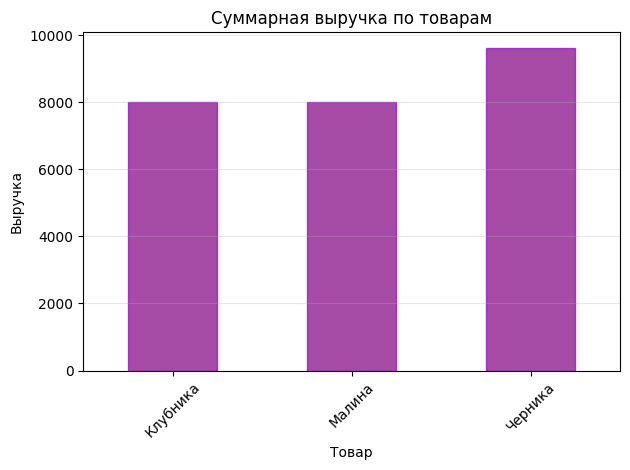

Обработанные данные:
      Товар   Цена  Количество  Общая_стоимость
0  Клубника  100.0          50           5000.0
1    Малина   80.0         100           8000.0
2  Клубника  100.0          30           3000.0
4   Черника  120.0          80           9600.0


In [119]:
import pandas as pd
import matplotlib.pyplot as plt

def pandas_sales_processing(data):
    df = pd.DataFrame(data)
    median_price = df['Цена'].median()
    df['Цена'] = df['Цена'].fillna(median_price)
    df = df[(df['Количество'] >= 1) & (df['Количество'] <= 1000)]
    df['Общая_стоимость'] = df['Цена'] * df['Количество']
    grouped = df.groupby('Товар')['Общая_стоимость'].sum()

    grouped.plot(kind='bar',
                 title='Суммарная выручка по товарам',
                 color='purple',
                 edgecolor='darkviolet',
                 alpha=0.7)

    plt.ylabel('Выручка')
    plt.xlabel('Товар')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    return df

data = {
    'Товар': ['Клубника', 'Малина', 'Клубника', 'Малина', 'Черника', 'Ежевика'],
    'Цена': [100, 80, None, 85, 120, 200],
    'Количество': [50, 100, 30, 0, 80, 1500]
}

result_df = pandas_sales_processing(data)
print("Обработанные данные:")
print(result_df)

In [120]:
import numpy as np
A = np.random.randint(1, 11, size=(5, 5))
B = np.random.randint(1, 11, size=(5, 5))
print("Матрица A (5x5):")
print(A)
print("\nМатрица B (5x5):")
print(B)
el_multiplication = A * B
print("\nПоэлементное произведение матриц:")
print(el_multiplication)
mat_multiplication = np.dot(A, B)
print("\nМатричное произведение:")
print(mat_multiplication)
det_A = np.linalg.det(A)
print(f"\nОпределитель матрицы A: {det_A:.2f}")
A_invert = np.linalg.inv(A)
print("\nОбратная матрица A⁻¹:")
print(A_invert)
C = A.sum(axis=1).reshape(-1, 1)

print("\nВектор C (суммы строк матрицы A):")
print(C)
x = np.linalg.solve(A, C)
print(x)

Матрица A (5x5):
[[ 5  8  8  9  5]
 [ 4  9  3  7 10]
 [ 6  8  2  9  1]
 [ 9  9  1  7  8]
 [ 1  1  4  6  1]]

Матрица B (5x5):
[[10  4  6  9  5]
 [ 2  6 10 10  9]
 [ 5  9  5  1  4]
 [ 5  6  6  7  4]
 [ 6 10  7  6  9]]

Поэлементное произведение матриц:
[[50 32 48 81 25]
 [ 8 54 30 70 90]
 [30 72 10  9  4]
 [45 54  6 49 32]
 [ 6 10 28 36  9]]

Матричное произведение:
[[181 244 239 226 210]
 [168 239 241 238 231]
 [137 154 187 205 155]
 [196 221 247 269 230]
 [ 68  92  79  71  63]]

Определитель матрицы A: 7686.00

Обратная матрица A⁻¹:
[[ 0.06375228 -0.20296643 -0.08821233  0.22326308  0.01301067]
 [ 0.08287796  0.09328649  0.14246682 -0.15261514 -0.26880042]
 [ 0.21311475 -0.08665105 -0.1030445  -0.00468384 -0.05854801]
 [-0.1575592   0.06284153  0.07923497 -0.01912568  0.23315118]
 [-0.05373406  0.07923497 -0.11748634  0.06284153  0.09107468]]

Вектор C (суммы строк матрицы A):
[[35]
 [33]
 [26]
 [34]
 [13]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [121]:
def safe_apply(func, data):
    results = []
    errors = []

    for element in data:
        try:
            # Пытаемся применить функцию к элементу
            result = func(element)
            results.append(result)
        except Exception as e:
            # Если возникло исключение, сохраняем элемент и ошибку
            errors.append((element, e))

    return results, errors


# Лямбда-функция для вычисления квадратного корня
sqrt_lambda = lambda x: float(x) ** 0.5

test_data = ['4', '16', 'text', '-25', '9.0']
results, errors = safe_apply(sqrt_lambda, test_data)

print("Успешные результаты:")
for i, (input_val, result) in enumerate(zip(test_data, results), 1):
      print(f"  {i}. ({input_val}) = {result}")

print("\nОшибки:")
if errors:
      for element, exception in errors:
          print(f"  Элемент: '{element}', Ошибка: {type(exception).__name__}: {exception}")
else:
      print("Ошибок нет!")

print("\nИтоговые данные:")
print(f"  Results: {results}")
print(f"  Errors: {errors}")

Успешные результаты:
  1. (4) = 2.0
  2. (16) = 4.0
  3. (text) = (3.061616997868383e-16+5j)
  4. (-25) = 3.0

Ошибки:
  Элемент: 'text', Ошибка: ValueError: could not convert string to float: 'text'

Итоговые данные:
  Results: [2.0, 4.0, (3.061616997868383e-16+5j), 3.0]
  Errors: [('text', ValueError("could not convert string to float: 'text'"))]


In [122]:
import time

class Timer:
    def __enter__(self):
        self.start = time.time()
        return self

    def __exit__(self, *args):
        self.end = time.time()
        print(f"Время выполнения: {self.end - self.start:.4f} сек")

# Тестируем на матричных операциях из задачи 4
import numpy as np

print("=== ТАЙМЕР ДЛЯ МАТРИЧНЫХ ОПЕРАЦИЙ ===")

with Timer():
    # Генерация матриц
    A = np.random.randint(1, 11, size=(5, 5))
    B = np.random.randint(1, 11, size=(5, 5))

    # Все операции из задачи 4
    elementwise = A * B
    matrix_prod = A @ B
    det_A = np.linalg.det(A)
    B_transposed = B.T

    try:
        A_inv = np.linalg.inv(A)
    except:
        pass

    C = A.sum(axis=1)
    try:
        x = np.linalg.solve(A, C)
    except:
        pass

print("Операции завершены!")

=== ТАЙМЕР ДЛЯ МАТРИЧНЫХ ОПЕРАЦИЙ ===
Время выполнения: 0.0003 сек
Операции завершены!


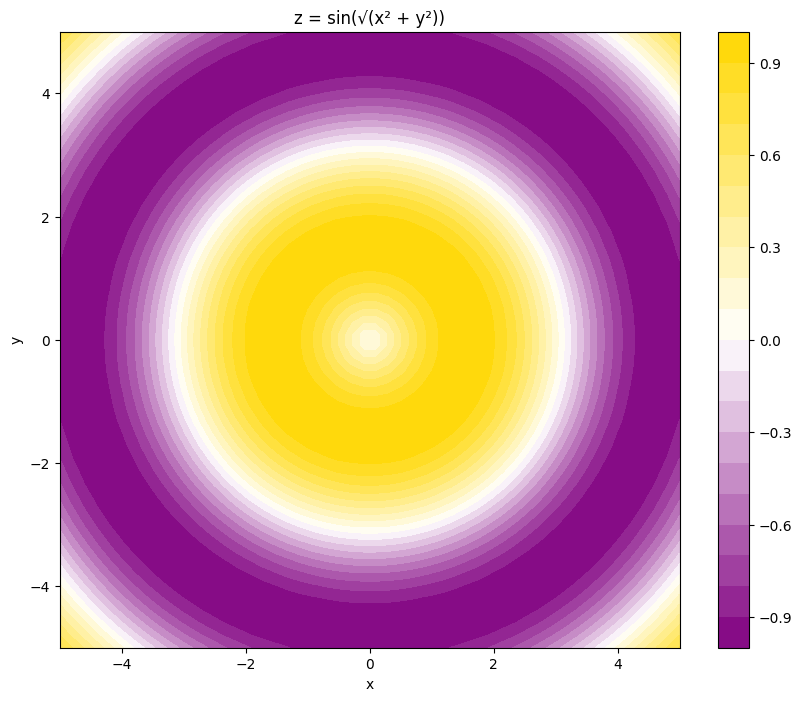

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

colors = ['purple', 'white', 'gold']
custom_cmap = LinearSegmentedColormap.from_list('purple_white_gold', colors, N=256)

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, levels=20, cmap=custom_cmap)
plt.colorbar()
plt.title('z = sin(√(x² + y²))')
plt.xlabel('x')
plt.ylabel('y')
plt.show()